<h3 style="text-align: center; font-family: 'Garamond'; font-size:50px"> Credit Risk Modelling </h3>

[1. Exploratory Data Analysis](#1)  
  
[2. Data Visualization](#2)<br><br>
### Part B Questions<br><br>

[Q1. Split the dataset into two subsets as follows](#3)

[Q2. For each subset, establish a training set and validation set. Explain:](#4)

[Q3. For each training set choose four variables which are suitable for building a scorecard. For each training set the variables must have the following:](#5)

[Q4. Using the binary variables obtained from the coarse classification in the above exercise to build two scorecards for each training set, one using linear regression, the other using logistic regression. Note this means you should have four scorecards in total?](#6)

[Q5. Derive ROC curves for all scorecards using the validation set applicable to each, showing in detail how sensitivity and specificity have been calculated. Estimate the Gini coefficient and KS values for each. Explain and comment on your results.](#7)
   _______________________________


In [1]:
# Importing Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 
%matplotlib inline

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LinearRegression

## 1.Exploratory Data Analysis by analyzing the dataset<a name="1"></a>

In [2]:
# Data path
#load and store data into a dataframe
df = pd.read_csv('german.csv')
#load and store data into a dataframe

# Results
print(f'Data dimension: {df.shape}')
print (df.columns)
df.head()

Data dimension: (1000, 21)
Index(['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')


,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

## 2. EDA By visualization<a name="2"></a>

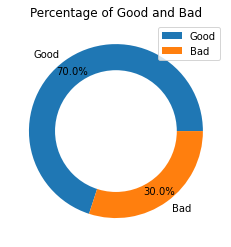

In [4]:
# Setting size in Chart based on 
sizes = df['Creditability'].value_counts()
labels = ['Good', 'Bad'] # Setting labels for items in Chart
    
# Pie Chart
plt.pie(sizes,labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Percentage of Good and Bad')
  
# Add Legends
plt.legend(labels, loc="upper right")
  
# Displaying Chart
plt.show()

<AxesSubplot:ylabel='Frequency'>

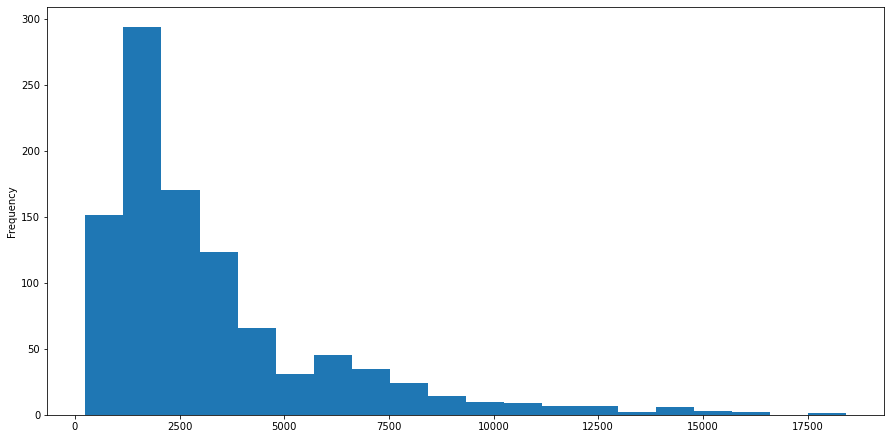

In [5]:
df["Credit_Amount"].plot.hist(bins = 20,figsize=(15,7.5))

# distribution of loan variable
# density between 0-7500 is high

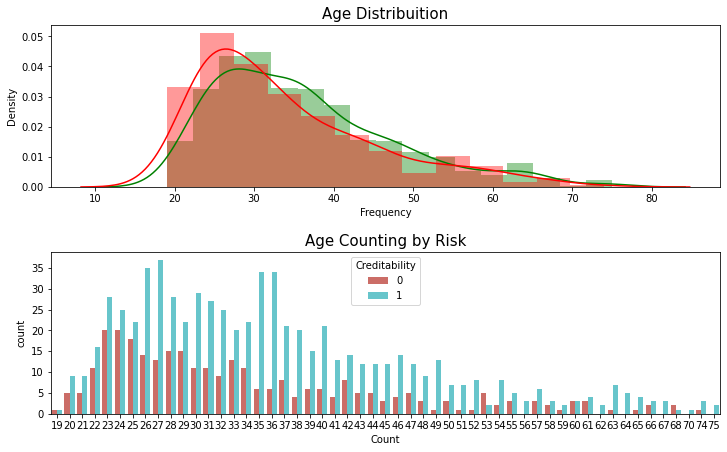

In [6]:
df_good = df[df["Creditability"] == 1]
df_bad = df[df["Creditability"] == 0]

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age_years"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age_years"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age_years",data=df, 
              palette="hls", ax=ax[1], 
              hue = "Creditability")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

<Figure size 432x288 with 0 Axes>

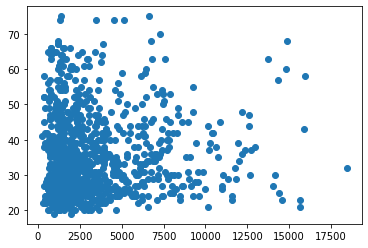

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(df['Credit_Amount'],df["Age_years"])
plt.figure()

<Figure size 432x288 with 0 Axes>

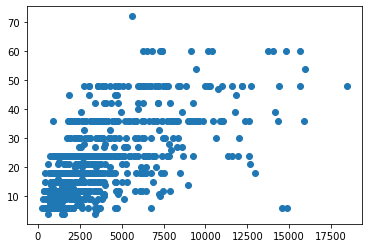

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(df['Credit_Amount'],df["Duration_of_Credit_monthly"])
plt.figure()

<Figure size 432x288 with 0 Axes>

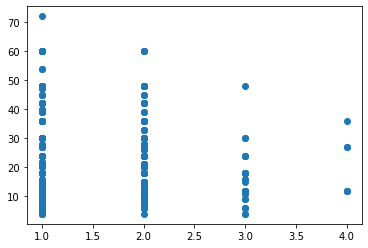

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(df['No_of_Credits_at_this_Bank'],df["Duration_of_Credit_monthly"])
plt.figure()

Text(0, 40, 'Frequency')

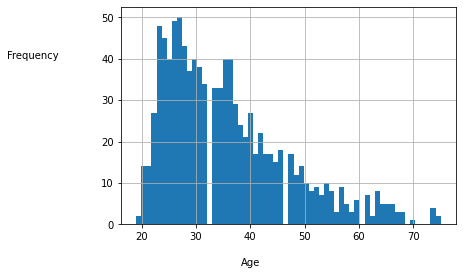

In [10]:
fig = df.Age_years.hist(bins=60)
fig.text(40, -10, 'Age', ha='center')
fig.text(0, 40, 'Frequency', ha='center')

Text(5, -50, 'Extremely Skilled')

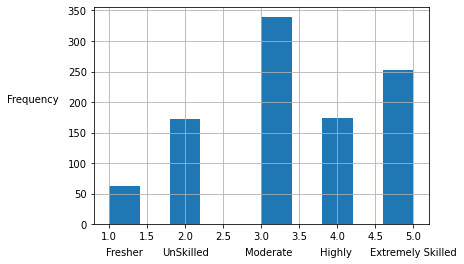

In [11]:
fig = df["Length_of_current_employment"].hist()
fig.text(0, 200, 'Frequency', ha='center')
fig.text(1.2, -50, 'Fresher', ha='center')
fig.text(2, -50, 'UnSkilled', ha='center')
fig.text(3.1, -50, 'Moderate', ha='center')
fig.text(4, -50, 'Highly ', ha='center')
fig.text(5, -50, 'Extremely Skilled', ha='center')


In [12]:
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA; 
from sklearn.preprocessing import normalize;
y = KMeans().fit_predict(df)
X_norm = normalize(df);
y_PCA = PCA(n_components=2).fit_transform(X_norm,2);
y_PCA.shape

(1000, 2)

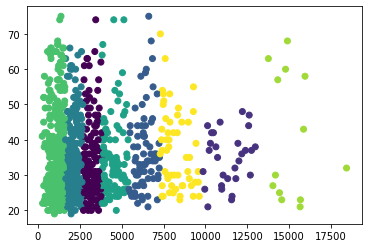

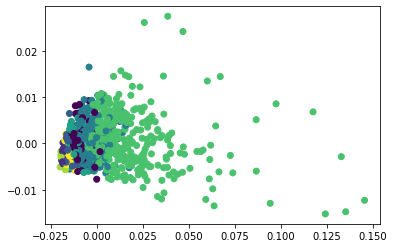

In [13]:
df['Purpose'] = df['Purpose'].replace([10], 9)
plt.scatter(df['Credit_Amount'],df['Age_years'],c=y)
plt.figure()
plt.scatter(y_PCA[:,0],y_PCA[:,1],c=y)

In [14]:
def ks_curve(df):
    df_new_1 = df.sort_values(by='Score', ascending=False)
    dummy=pd.get_dummies(df_new_1['Creditability'])
    df_new_2 = pd.concat((df_new_1, dummy), axis=1)
    data = df_new_2.rename({0: 'bad_borrower', 1: 'good_borrower'}, axis='columns')
    
    # Calculate the cumulative percentage of good and bad borrowers at each credit score
    data['cum_good_pct'] = data['good_borrower'].cumsum() / data['good_borrower'].sum()
    data['cum_bad_pct'] = data['bad_borrower'].cumsum() / data['bad_borrower'].sum()

    # Calculate the KS statistic at each credit score
    data['ks_statistic'] = data['cum_good_pct'] - data['cum_bad_pct']

    # Plot the KS curve
    plt.plot(data['Score'], data['cum_good_pct'], label='Good borrowers')
    plt.plot(data['Score'], data['cum_bad_pct'], label='Bad borrowers')
    plt.plot(data['Score'], data['ks_statistic'], label='KS statistic')
    plt.legend(loc='lower right')
    plt.title('KS Curve for Credit Scorecard')
    plt.xlabel('Credit Score')
    plt.ylabel('Cumulative Percentage')
    plt.show()
    return

In [15]:
from scipy.stats import ks_2samp
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    KS_ = ks.statistic
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    # Calculate the Gini coefficient and KS statistic
    gini = 2 * roc_auc - 1
    print(f'1. AUROC={roc_auc:.4f}, \n2. Gini={gini:.4f}, \n3. KS={ks.statistic:.4f} (p-value: {ks.pvalue:.3e})')

    plt.figure(figsize=(20,13))
    plt.subplot(2, 2, 1)
    lw=2
    fpr, tpr, thresholds = roc_curve(df['real'] , df['proba'])
    # plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
    # plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()
    plt.title('ROC curve');

    plt.subplot(2, 2, 2)
    # draw a PR curve
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(class1) / len(y_real)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # calculate inputs for the PR curve
    precision, recall, thresholds = precision_recall_curve(df['real'] , df['proba'])
    # plot PR curve
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim(0, 1)
    plt.ylim(0, 1.2)
    plt.legend()
    plt.title('Precision-Recall Curve');
    
    plt.subplot(2, 2, 3)
    # calcualting ks statistic
    actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
    actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
    actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
    actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
    actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
    actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
    actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
    actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
    plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
    plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k',
         label='KS Score (area = %0.2f)' % (ks.statistic))
    plt.legend()
    plt.title('Kolmogorov-Smirnov Statistic');

    plt.subplot(2, 2, 4)
    plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r',label='Bad')
    plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g', label='Good')
    plt.legend()
    
    return ks.statistic, roc_auc, gini

In [16]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'Total_Count', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['Total_Count'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

## Q1. Split the dataset into two subsets as follows:<a name="3"></a>
        Subset 1: the applicants with Checking = 1 or Checking = 2
        Subset 2: the applicants where Checking = 3 or Checking = 4
        
        Clean the subsets if necessary.

In [17]:
checking_1_or_2 = df.loc[df['Account_Balance'] < 3] #subset 1 with Checking values 1 or 2
checking_3_or_4 = df.loc[df['Account_Balance'] > 2] #subset 2 with Checking values 3 or 4

- The data is accurately divided into two categories.
- Values for each variable are presumed to be within the typical range, therefore no cleaning is necessary.

## Q2. For each subset, establish a training set and validation set. Explain:<a name="4"></a>
        a. what principle you have used to decide on these;
        b. why both training and validation sets are needed;
        c. any issues encountered during the splitting exercise.

In [18]:
s = checking_1_or_2['Creditability']
counts = s.value_counts()
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
s1 = checking_3_or_4['Creditability']
counts1 = s1.value_counts()
percent_1 = s1.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'Count of checking 1 or 2':counts, 'Percentage of checking 1 or 2':percent100,'Count of checking 3 or 4':counts1, 'Percentage of checking 3 or 4':percent_1})

,Count of checking 1 or 2,Percentage of checking 1 or 2,Count of checking 3 or 4,Percentage of checking 3 or 4
1,303,55.8%,397,86.9%
0,240,44.2%,60,13.1%


In [19]:
X = checking_1_or_2.iloc[:,1:]
Y = checking_1_or_2[['Creditability']]
X_train_subset1, X_test_subset1, y_train_subset1, y_test_subset1 = train_test_split(X, Y, test_size=1/3, random_state=85, stratify=Y.iloc[:])

In [20]:
X = checking_3_or_4.iloc[:,1:]
Y = checking_3_or_4[['Creditability']]
X_train_subset2, X_test_subset2, y_train_subset2, y_test_subset2 = train_test_split(X, Y, test_size=1/3, random_state=85, stratify=Y.iloc[:])

Data having imbalanced class distribution:

    - subset 1: Bad (44.2%) and Good (55.8%)
    - subset 2: Bad (13.1%) and Good (86.9%)

It is required that data be divided into two sets: test and train (validation). This allows the model to be validated against previously unknown data. This ensures, to some extent, that the model will perform better with additional data.

• There is no standard method for determining the split ratio. It is an iterative technique that avoids overfitting or underfitting data.

• Because of the extremely skewed data in subset 2, the 70-30 split ratio is used in this investigation.

• Subset 2 is far more unbalanced than Subset 1. The fraction of predictor class may fluctuate when splitting. As a result, when evaluated against new data, the model's performance may suffer. To address this, a stratified sampling strategy is utilised, in which a proportion of labels is kept even after data is separated.

### Q3. For each training set choose four variables which are suitable for building a scorecard. For each training set the variables must have <a name="5"></a>
    (i) at least one continuous variable before binning; 
    (ii) at least one categorical variable with more than two categories, so you can see whether categories can be combined.
    
    Explain the rationale behind your choice of variables (using supporting statistics eg chi-square). Should you be unable to choose variables satisfying the above criteria, explain the problem you have encountered and the solution you have chosen to compromise the variable selection.

#### Steps applied in the selection of variables:
- **Step 1**: Using Pearson's Chi-squared test to examine categorical variable dependence and choose statistically significant variables. 

- **Step 2**: Using Information Value (IV) statistics to pick both Qualitative and Qualitative variables with the use of information collected in Step 1 to avoid the "too good to be true" scenario. 

- **Step 3**: Complete the selection of variables from Steps 1 and 2 by assuring a minimum of one quantitative variable before binning and one qualitative variable with more than two categories. 

- **Step 4**: Use the Weight of Evidence (WOE) technique to conduct a coarse categorization of final variables to compare the strength of quantitative and qualitative factors. 

#### Problems encountered and corresponding remedial actions:
- Furthermore, due to the unbalanced data, the paired two-sample t-Test cannot be used, thus the numerical variables are chosen using Information Value (IV) statistics. 
- Data from the **Duration** variable reveal a three-month surge in aggregated numbers. The **Duration** variable, on the other hand, is not continuous, which restricts the binning procedure as suggested by WOE values. 
- The distribution of quantitative variables is not Gaussian, making it difficult to choose an equal length binning. 
- When dealing with severely unbalanced data, a 60-40 split is used to ensure that a model does not learn too much about the unknown data while also avoiding underfitting. 
- WOE does not exhibit monotonic behaviour for some of the variables. To solve this, groups with similar signs (+ve or -ve) are combined while keeping a small variation in WOE value in mind. 
- Because Chi-Square test statistics do not give many possibilities for **Subset 2**, variable selection is heavily influenced by IV statistics. 
- Additionally, IV statistics imply that the **Checking** variable has the greatest IV value, but it only has two categories, thus lower-order variables are chosen for **Subset 2**.
- WOE statistics suggest discontinuous binning for the variables **Amount** and **Age**, and the WOE distribution is not monotone. To circumvent this, values with similar signs (+ve or -ve) and near ranges combined. This resulted in more than five groups, but due to the reduced amount of data, the coarse classification will not take too long to compute. However, when working with a huge dataset, this issue requires a better method. 

<AxesSubplot:>

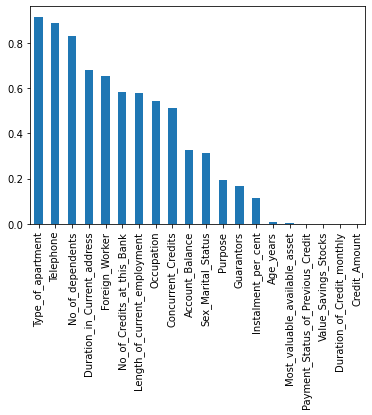

In [21]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X = checking_1_or_2.drop('Creditability',axis=1)
y = checking_1_or_2['Creditability']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

<AxesSubplot:>

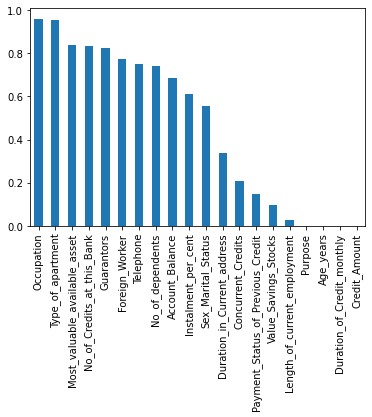

In [22]:
X = checking_3_or_4.drop('Creditability',axis=1)
y = checking_3_or_4['Creditability']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [23]:
iv, woe = iv_woe(data = checking_1_or_2, target = 'Creditability', bins=5, show_woe = True)
print(iv)

Information value of Account_Balance is 0.043235
          Variable Cutoff  Total_Count  Events  % of Events  Non-Events  \
0  Account_Balance      1          274     139     0.458746         135   
1  Account_Balance      2          269     164     0.541254         105   

   % of Non-Events       WoE        IV  
0           0.5625  0.203895  0.021155  
1           0.4375 -0.212812  0.022080  
Information value of Duration_of_Credit_monthly is 0.225393
                     Variable         Cutoff  Total_Count  Events  \
0  Duration_of_Credit_monthly   (12.0, 17.6]           34      23   
1  Duration_of_Credit_monthly   (17.6, 24.0]          182      99   
2  Duration_of_Credit_monthly   (24.0, 31.8]           35      19   
3  Duration_of_Credit_monthly   (31.8, 72.0]          109      39   
4  Duration_of_Credit_monthly  (5.999, 12.0]          183     123   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.075908          11         0.045833 -0.504505  0.0151

- from the IV value we select the variables 'Value_Savings_Stocks', 'Payment_Status_of_Previous_Credit', 'Credit_Amount', 'Duration_of_Credit_monthly'.
- Bin Values
    - The bin values for Duration variable is 6-12, 12-17, 17-24, 24-32 and 32-72.
    - The bin values for Credit amount variable is 276-1225, 1225-1950, 1950-3062, 3062-5298 and 5298-18424.

In [24]:
iv, woe = iv_woe(data = checking_3_or_4, target = 'Creditability', bins=5, show_woe = True)
print(iv)

Information value of Account_Balance is 0.084717
          Variable Cutoff  Total_Count  Events  % of Events  Non-Events  \
0  Account_Balance      3           63      49     0.123426          14   
1  Account_Balance      4          394     348     0.876574          46   

   % of Non-Events       WoE        IV  
0         0.233333  0.636829  0.069992  
1         0.766667 -0.133969  0.014724  
Information value of Duration_of_Credit_monthly is 0.312408
                     Variable         Cutoff  Total_Count  Events  \
0  Duration_of_Credit_monthly   (11.0, 15.0]          122     111   
1  Duration_of_Credit_monthly   (15.0, 21.0]           62      45   
2  Duration_of_Credit_monthly   (21.0, 24.0]           93      85   
3  Duration_of_Credit_monthly   (24.0, 60.0]           86      70   
4  Duration_of_Credit_monthly  (3.999, 11.0]           94      86   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.279597          11         0.183333 -0.422043  0.0406

4         0.116667 -0.468563  0.032674  
Information value of Concurrent_Credits is 0.165647
             Variable Cutoff  Total_Count  Events  % of Events  Non-Events  \
0  Concurrent_Credits      1           50      37     0.093199          13   
1  Concurrent_Credits      2           22      17     0.042821           5   
2  Concurrent_Credits      3          385     343     0.863980          42   

   % of Non-Events       WoE        IV  
0         0.216667  0.843623  0.104160  
1         0.083333  0.665816  0.026974  
2         0.700000 -0.210469  0.034513  
Information value of Type_of_apartment is 0.03223
            Variable Cutoff  Total_Count  Events  % of Events  Non-Events  \
0  Type_of_apartment      1           66      55     0.138539          11   
1  Type_of_apartment      2          351     309     0.778338          42   
2  Type_of_apartment      3           40      33     0.083123           7   

   % of Non-Events       WoE        IV  
0         0.183333  0.280154  

- from the IV value we select the variables 'Purpose', 'Age_years', 'Credit_Amount', 'Duration_of_Credit_monthly'.
- Bin Values
    - The bin values for Duration variable is 4-11, 11-15, 15-21, 21-24 and 24-60.
    - The bin values for Credit amount variable is 250-1287, 1287-1818, 1818-2677, 2677-4201 and 4201-15653.
    - The bin values for Age variable is 19-27, 27-32, 32-37, 37-46 and 46-74.

### Binning and Encoding of data for Checking = 1 or 2

In [25]:
X_train_subset_01 =X_train_subset1[['Value_Savings_Stocks', 'Payment_Status_of_Previous_Credit', 'Credit_Amount', 'Duration_of_Credit_monthly']] 
X_test_subset_01 =X_test_subset1[['Value_Savings_Stocks', 'Payment_Status_of_Previous_Credit', 'Credit_Amount', 'Duration_of_Credit_monthly']] 


#Creating bins which found in the WOE 
Duration_band = [5.999,12.0,17.6,24.0,31.8,72.0]
bin_labels =['6_12', '12_17','17_24', '24_32','32_72']
X_train_subset_01['Duration_band'] = pd.cut(X_train_subset_01['Duration_of_Credit_monthly'], bins=Duration_band, labels=bin_labels)
X_test_subset_01['Duration_band'] = pd.cut(X_test_subset_01['Duration_of_Credit_monthly'], bins=Duration_band, labels=bin_labels)

Credit_bank = [275.999, 1225.0,1950.6, 3061.8, 5298.4,18424.0]
credit_bin_labels =['276_1225', '1225_1950','1950_3062', '3062_5298','5298_18424']
X_train_subset_01['Amount_band'] = pd.cut(X_train_subset_01['Credit_Amount'], bins=Credit_bank, labels=credit_bin_labels)
X_test_subset_01['Amount_band'] = pd.cut(X_test_subset_01['Credit_Amount'], bins=Credit_bank, labels=credit_bin_labels)

df_categorical_01 = X_train_subset_01[['Value_Savings_Stocks', 'Payment_Status_of_Previous_Credit', 'Duration_band', 'Amount_band']]
df_categorical_02 = X_test_subset_01[['Value_Savings_Stocks', 'Payment_Status_of_Previous_Credit', 'Duration_band', 'Amount_band']]

#Encoding of data with the Dummy variables
x= ['Value_Savings_Stocks', 'Payment_Status_of_Previous_Credit', 'Duration_band', 'Amount_band']

for cat in x:
    df_categorical_01[cat]= df_categorical_01[cat].map(str)
    df_categorical_02[cat]= df_categorical_02[cat].map(str)
X_train_df1 = pd.get_dummies(df_categorical_01, drop_first=True, dtype=np.int64)
X_test_df1 = pd.get_dummies(df_categorical_02, drop_first=True, dtype=np.int64)


### Binning and Encoding of data for Checking = 3 or 4

In [26]:
X_train_subset_02 =X_train_subset2[['Purpose', 'Age_years', 'Credit_Amount', 'Duration_of_Credit_monthly']] 
X_test_subset_02 =X_test_subset2[['Purpose', 'Age_years', 'Credit_Amount', 'Duration_of_Credit_monthly']] 


#Creating bins which found in the WOE 
Duration_band = [3.999,11.0,15.0,21.0,24,60.0]
bin_labels =['4_11', '11_15','15_21', '21_24','24_60']
X_train_subset_02['Duration_band'] = pd.cut(X_train_subset_02['Duration_of_Credit_monthly'], bins=Duration_band, labels=bin_labels)
X_test_subset_02['Duration_band'] = pd.cut(X_test_subset_02['Duration_of_Credit_monthly'], bins=Duration_band, labels=bin_labels)

Credit_bank = [249.999, 1287.0,1817.8, 2677.4, 4201.0,15653.0]
credit_bin_labels =['250_1287', '1287_1818','1818_2677', '2677_4201','4201_15653']
X_train_subset_02['Amount_band'] = pd.cut(X_train_subset_02['Credit_Amount'], bins=Credit_bank, labels=credit_bin_labels)
X_test_subset_02['Amount_band'] = pd.cut(X_test_subset_02['Credit_Amount'], bins=Credit_bank, labels=credit_bin_labels)

Credit_bank = [18.999, 27.0,32.0, 37.0, 46.0,74.0]
credit_bin_labels =['19_27', '27_32','32_37', '37_46','46_74']
X_train_subset_02['Age_band'] = pd.cut(X_train_subset_02['Age_years'], bins=Credit_bank, labels=credit_bin_labels)
X_test_subset_02['Age_band'] = pd.cut(X_test_subset_02['Age_years'], bins=Credit_bank, labels=credit_bin_labels)


df_categorical_01 = X_train_subset_02[['Purpose', 'Age_band', 'Duration_band', 'Amount_band']]
df_categorical_02 = X_test_subset_02[['Purpose', 'Age_band', 'Duration_band', 'Amount_band']]

#Encoding of data with the Dummy variables
x= ['Purpose', 'Age_band', 'Duration_band', 'Amount_band']

for cat in x:
    df_categorical_01[cat]= df_categorical_01[cat].map(str)
    df_categorical_02[cat]= df_categorical_02[cat].map(str)
X_train_df2 = pd.get_dummies(df_categorical_01, drop_first=True, dtype=np.int64)
X_test_df2 = pd.get_dummies(df_categorical_02, drop_first=True, dtype=np.int64)

In [ ]:
- For Subset 2, only two variables seem statistically significant at 5% significance level; this could be because of the highly imbalanced labels.
- Finding Information Value to further extend the variable selction.

### Q4. Using the binary variables obtained from the coarse classification in the above exercise to build two scorecards for each training set, one using linear regression, the other using logistic regression. Note this means you should have four scorecards in total:<a name="6"></a>
    (i) using linear regression for Checking = 1 or 2;
    (ii) using logistic regression for Checking = 1 or 2;
    (iii) using linear regression for Checking = 3 or 4;
    (iv) using logistic regression for Checking = 3 or 4;
    
    Note that the file you submit should include, in the Appendix, a table that gives the binary variables you used, together with the coefficients for those variables calculated in each regression.

# 1. Using linear regression for Checking = 1 or 2

In [27]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn import linear_model
#import libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
#dealing with imbalanced data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train_df1, y_train_subset1)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_o.values == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_o.values == 0)))

After OverSampling, counts of label '1': [202]
After OverSampling, counts of label '0': [202]


In [28]:
#building logistic regression model
model = LinearRegression()

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(model, X_train_o, y_train_o, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini on the train set
print('Mean AUROC of train data: %.4f' % (AUROC))
print('Gini of train data: %.4f' % (GINI))
# pretty impressive scores for the first time, now let's fit the pipeline on the whole training set
model.fit(X_train_df1, y_train_subset1)

Mean AUROC of train data: 0.6324
Gini of train data: 0.2649


LinearRegression()

In [29]:
# pretty impressive scores for the first time, now let's fit the pipeline on the whole training set
model.fit(X_train_df1, y_train_subset1)

y_pred = model.predict(X_test_df1)
# get the predicted probabilities
y_hat_test_proba = model.predict(X_test_df1)
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_subset1.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_pred)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test_df1.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
630,1,0.726289,0.726289
585,1,0.527751,0.527751
453,1,0.568572,0.568572
428,1,0.706898,0.706898
373,1,0.500062,0.500062


1. AUROC=0.7223, 
2. Gini=0.4446, 
3. KS=0.4134 (p-value: 2.269e-07)


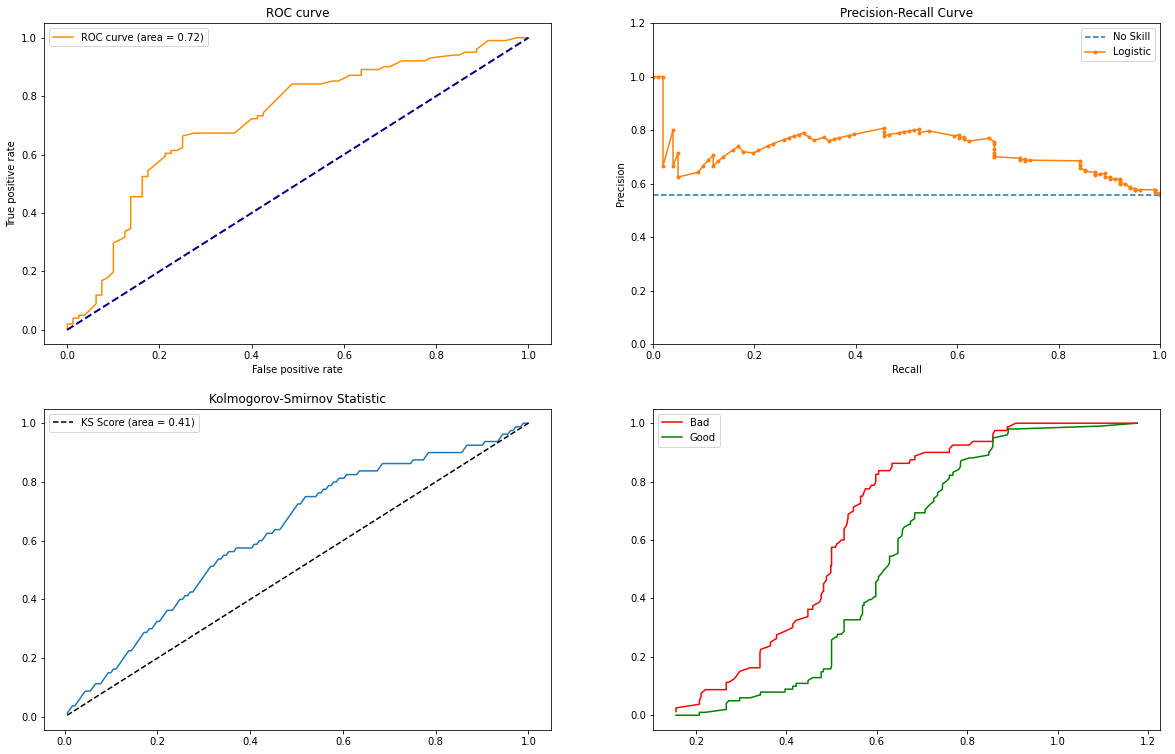

In [30]:
ks_good, auc_good, gini = evaluate_ks_and_roc_auc(y_test_subset1, y_hat_test_proba)

1. The AUROC of 0.7223 indicates that the model outperforms random guessing but still has space for improvement.
2. A Gini coefficient of 0.4446 suggests that the model separates positive and negative samples relatively well, but there is still room for improvement.
3. A greater KS value suggests that the two groups are better separated. In this situation, a KS value of 0.4134 with a very low p-value indicates that the model is effective at distinguishing between positive and negative data.

In [31]:
# Store the column names in X_train as a list
feature_name = X_train_df1.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(model.coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,0.314297
1,Value_Savings_Stocks_2,0.036526
2,Value_Savings_Stocks_3,0.268475
3,Value_Savings_Stocks_4,0.143728
4,Value_Savings_Stocks_5,0.206836
5,Payment_Status_of_Previous_Credit_1,0.028562
6,Payment_Status_of_Previous_Credit_2,0.185765
7,Payment_Status_of_Previous_Credit_3,0.342409
8,Payment_Status_of_Previous_Credit_4,0.332675
9,Duration_band_12_17,-0.018511


### Score card Calcualate by the Probability

In [32]:
# get the predicted probabilities
y_hat_test_proba = 1- (model.predict(X_test_df1))
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_subset1.copy()
y_hat_test=model.predict(X_test_df1)
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_hat_test)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'Prob_0', 'Prob_1']
y_test_proba.index = X_test_df1.index
# Calculate the scorecard points for each variable
basepoints = 600
PDO = 20
factor = PDO / np.log(2)
offset = basepoints - factor * np.log(1/50)

In [33]:
for i in range(len(y_test_proba['Prob_0'])):
    if y_test_proba['Prob_0'].iloc[i]<0:
        y_test_proba['Prob_0'].replace(y_test_proba['Prob_0'].iloc[i], 0.01, inplace=True)
linear_regression_score_1_or_2 = pd.concat([X_test_df1,y_test_proba], axis=1)

In [34]:
linear_regression_score_1_or_2['Credit_Score'] = linear_regression_score_1_or_2.apply(lambda row: round(np.log(row.Prob_0/row.Prob_1)*factor+offset), axis=1)

In [78]:
linear_regression_score_1_or_2

,Value_Savings_Stocks_2,Value_Savings_Stocks_3,Value_Savings_Stocks_4,Value_Savings_Stocks_5,Payment_Status_of_Previous_Credit_1,Payment_Status_of_Previous_Credit_2,Payment_Status_of_Previous_Credit_3,Payment_Status_of_Previous_Credit_4,Duration_band_12_17,Duration_band_17_24,Duration_band_24_32,Duration_band_32_72,Amount_band_1225_1950,Amount_band_1950_3062,Amount_band_3062_5298,Amount_band_5298_18424,y_test_class_actual,Prob_0,Prob_1,Credit_Score
630,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0.273711,0.726289,685
585,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0.472249,0.527751,710
453,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0.431428,0.568572,705
428,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.293102,0.706898,687
373,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.499938,0.500062,713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.402110,0.597890,701
662,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.343294,0.656706,694
206,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.499938,0.500062,713
592,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0.511410,0.488590,714


# 2. Using logistic regression for Checking = 1 or 2

In [36]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

#building logistic regression model
model = LogisticRegression(max_iter=1000, class_weight = 'balanced')

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(model, X_train_o, y_train_o, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini on the train set
print('Mean AUROC of train data: %.4f' % (AUROC))
print('Gini of train data: %.4f' % (GINI))
# pretty impressive scores for the first time, now let's fit the pipeline on the whole training set
model.fit(X_train_df1, y_train_subset1)

Mean AUROC of train data: 0.6290
Gini of train data: 0.2579


LogisticRegression(class_weight='balanced', max_iter=1000)

In [37]:
# Store the column names in X_train as a list
feature_name = X_train_df1.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(model.coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,-0.469585
1,Value_Savings_Stocks_2,0.107200
2,Value_Savings_Stocks_3,0.867069
3,Value_Savings_Stocks_4,0.416731
4,Value_Savings_Stocks_5,0.880246
5,Payment_Status_of_Previous_Credit_1,-0.279802
6,Payment_Status_of_Previous_Credit_2,0.350515
7,Payment_Status_of_Previous_Credit_3,0.883735
8,Payment_Status_of_Previous_Credit_4,0.994797
9,Duration_band_12_17,0.027552


              precision    recall  f1-score   support

           0       0.61      0.71      0.66        80
           1       0.74      0.63      0.68       101

    accuracy                           0.67       181
   macro avg       0.67      0.67      0.67       181
weighted avg       0.68      0.67      0.67       181



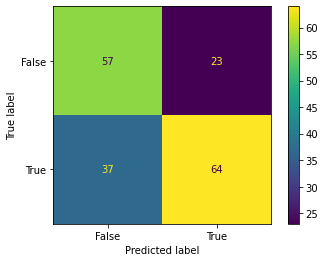

,y_test_class_actual,y_hat_test_proba,y_hat_test
630,1,0.685801,1
585,1,0.494392,0
453,1,0.498573,0
428,1,0.681609,1
373,1,0.470268,0


In [38]:
# make preditions on our test set
y_hat_test = model.predict(X_test_df1)
print(classification_report(y_test_subset1,y_hat_test ))
cm = metrics.confusion_matrix(y_test_subset1,y_hat_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show() 
# get the predicted probabilities
y_hat_test_proba = model.predict_proba(X_test_df1)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_subset1.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_hat_test)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test_df1.index
y_test_proba.head()

In [39]:
# assign a threshold value to differentiate good with bad
tr = 0.4
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimat threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.13259669, 0.30939227],
       [0.06077348, 0.49723757]])

1. AUROC=0.7189, 
2. Gini=0.4379, 
3. KS=0.3957 (p-value: 8.916e-07)


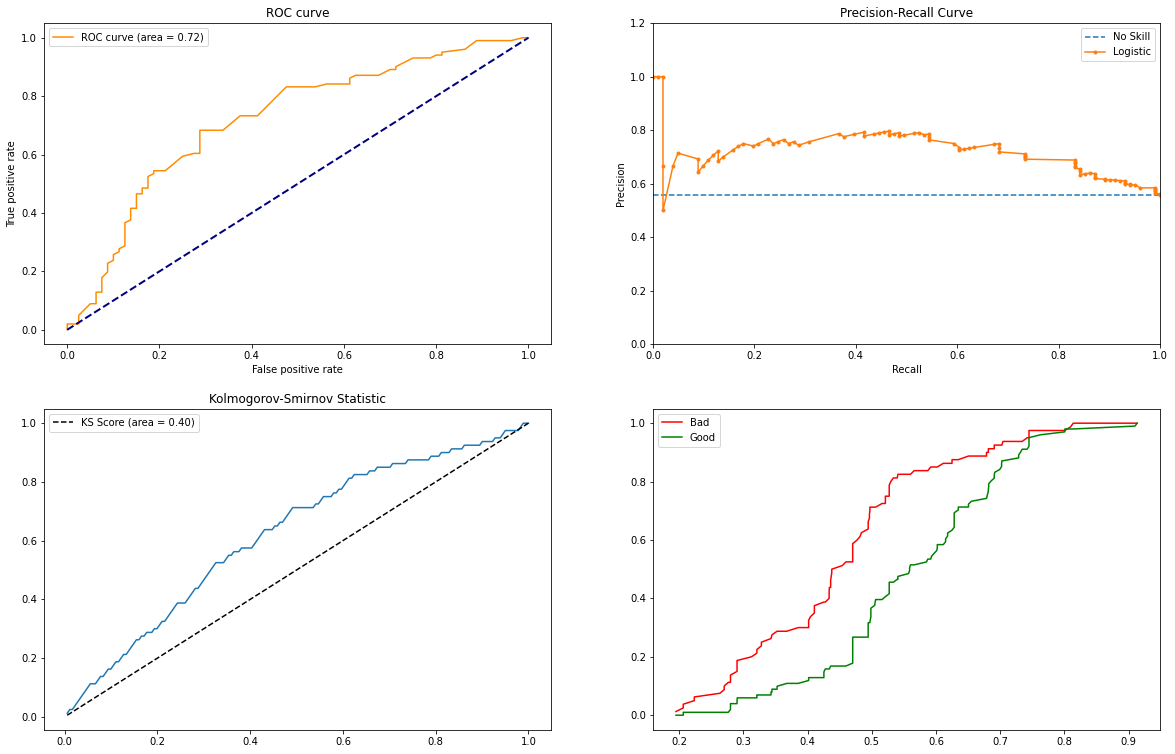

In [40]:
ks_good, auc_good, gini = evaluate_ks_and_roc_auc(y_test_subset1, y_hat_test_proba)

### Applying the Model - Scorecard Creation

In [41]:
# make preditions on our test set
y_hat_test = model.predict(X_test_df1)
# get the predicted probabilities
y_pred = model.predict_proba(X_test_df1)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_pred[:][: , 1]
probability_0 = y_pred[:][: , 0]
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_subset1.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(probability_0), pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_hat_test)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'Prob_0', 'Prob_1', 'y_hat_test']
y_test_proba.index = X_test_df1.index
y_test_proba.head()
# Calculate the scorecard points for each variable
basepoints = 600
PDO = 20
factor = PDO / np.log(2)
offset = basepoints - factor * np.log(1/50)

In [42]:
for i in range(len(y_test_proba['Prob_0'])):
    if y_test_proba['Prob_0'].iloc[i]<0:
        y_test_proba['Prob_0'].replace(y_test_proba['Prob_0'].iloc[i], 0.01, inplace=True)

In [43]:
logistics_regression_score_1_or_2 = pd.concat([X_test_df1,y_test_proba], axis=1)


In [44]:
logistics_regression_score_1_or_2['Credit_Score'] = logistics_regression_score_1_or_2.apply(lambda row: round(np.log(row.Prob_0/row.Prob_1)*factor+offset), axis=1)

logistics_regression_score_1_or_2

,Value_Savings_Stocks_2,Value_Savings_Stocks_3,Value_Savings_Stocks_4,Value_Savings_Stocks_5,Payment_Status_of_Previous_Credit_1,Payment_Status_of_Previous_Credit_2,Payment_Status_of_Previous_Credit_3,Payment_Status_of_Previous_Credit_4,Duration_band_12_17,Duration_band_17_24,...,Duration_band_32_72,Amount_band_1225_1950,Amount_band_1950_3062,Amount_band_3062_5298,Amount_band_5298_18424,y_test_class_actual,Prob_0,Prob_1,y_hat_test,Credit_Score
630,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,1,0.314199,0.685801,1,690
585,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0.505608,0.494392,0,714
453,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,1,0.501427,0.498573,0,713
428,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0.318391,0.681609,1,691
373,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0.529732,0.470268,0,716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.472846,0.527154,1,710
662,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0.397918,0.602082,1,701
206,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0.529732,0.470268,0,716
592,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0.562337,0.437663,0,720


# 3. Using linear regression for Checking = 3 or 4

In [45]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn import linear_model
#import libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
#dealing with imbalanced data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train_df2, y_train_subset2)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_o.values == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_o.values == 0)))

After OverSampling, counts of label '1': [264]
After OverSampling, counts of label '0': [264]


In [46]:
#building logistic regression model
model = LinearRegression()

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(model, X_train_o, y_train_o, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini on the train set
print('Mean AUROC of train data: %.4f' % (AUROC))
print('Gini of train data: %.4f' % (GINI))
# pretty impressive scores for the first time, now let's fit the pipeline on the whole training set
model.fit(X_train_df2, y_train_subset2)

Mean AUROC of train data: 0.7275
Gini of train data: 0.4550


LinearRegression()

In [47]:
# pretty impressive scores for the first time, now let's fit the pipeline on the whole training set
model.fit(X_train_df2, y_train_subset2)

y_hat_test = model.predict(X_test_df2)
# get the predicted probabilities
y_hat_test_proba = model.predict(X_test_df2)
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_subset2.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_hat_test)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test_df2.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
268,1,0.851241,0.851241
325,1,0.952339,0.952339
175,1,1.053325,1.053325
61,1,1.066900,1.066900
280,1,0.963476,0.963476


1. AUROC=0.6648, 
2. Gini=0.3297, 
3. KS=0.2996 (p-value: 6.876e-02)


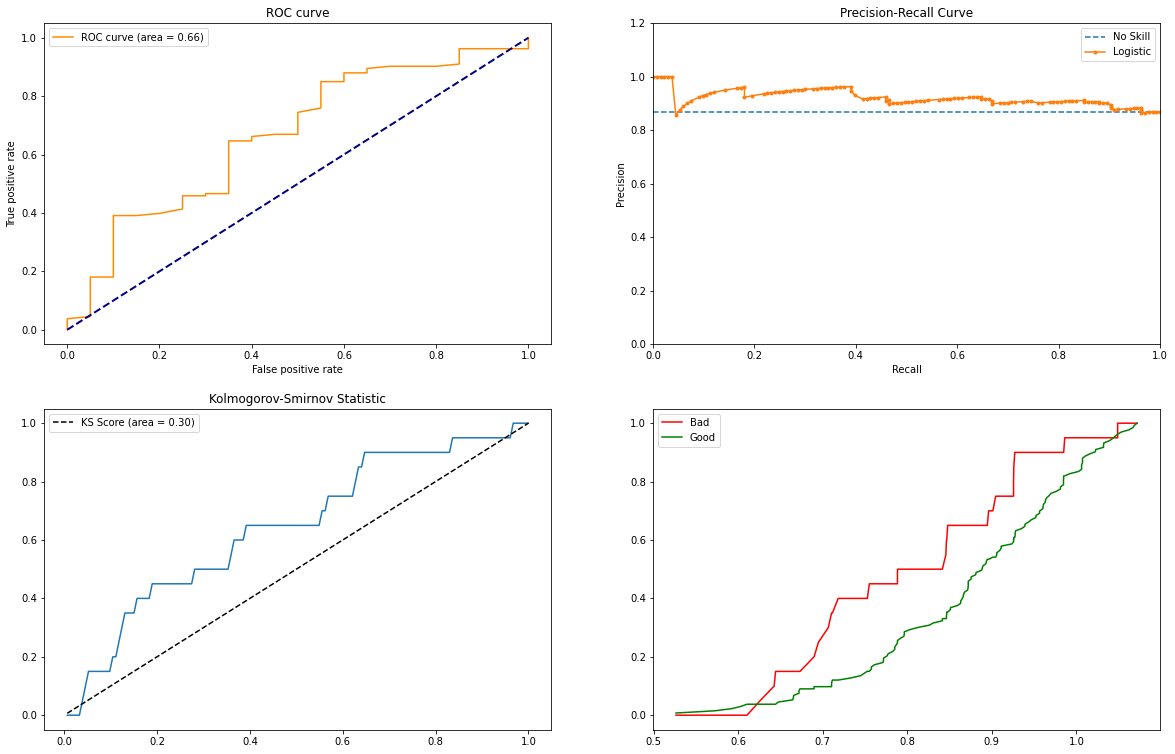

In [48]:
ks_good, auc_good, gini = evaluate_ks_and_roc_auc(y_test_subset2, y_hat_test_proba)

In [49]:
# Store the column names in X_train as a list
feature_name = X_train_df2.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(model.coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,0.791913
1,Purpose_1,0.174755
2,Purpose_2,0.054743
3,Purpose_3,0.096802
4,Purpose_4,0.136226
5,Purpose_5,-0.123366
6,Purpose_6,-0.013465
7,Purpose_8,0.081426
8,Purpose_9,-0.041315
9,Age_band_27_32,0.074760


In [50]:
# get the predicted probabilities
y_hat_test_proba = 1- (model.predict(X_test_df2))
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_subset2.copy()
y_hat_test=model.predict(X_test_df2)
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_hat_test)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'Prob_0', 'Prob_1']
y_test_proba.index = X_test_df2.index
# Calculate the scorecard points for each variable
basepoints = 600
PDO = 20
factor = PDO / np.log(2)
offset = basepoints - factor * np.log(1/50)

In [51]:
for i in range(len(y_test_proba['Prob_0'])):
    if y_test_proba['Prob_0'].iloc[i]<0:
        y_test_proba['Prob_0'].replace(y_test_proba['Prob_0'].iloc[i], 0.01, inplace=True)
linear_regression_score_3_or_4 = pd.concat([X_test_df2,y_test_proba], axis=1)

In [52]:
linear_regression_score_3_or_4['Credit_Score'] = linear_regression_score_3_or_4.apply(lambda row: round(np.log(row.Prob_0/row.Prob_1)*factor+offset), axis=1)
linear_regression_score_3_or_4

,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_8,Purpose_9,Age_band_27_32,Age_band_32_37,...,Duration_band_21_24,Duration_band_24_60,Amount_band_1287_1818,Amount_band_1818_2677,Amount_band_2677_4201,Amount_band_4201_15653,y_test_class_actual,Prob_0,Prob_1,Credit_Score
268,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.148759,0.851241,663
325,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0.047661,0.952339,626
175,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0.010000,1.053325,579
61,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0.010000,1.066900,578
280,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.036524,0.963476,618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0.187138,0.812862,670
193,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0.074290,0.925710,640
265,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0.010000,1.002601,580
749,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0.015024,0.984976,592


# 4. Using logistic regression for Checking = 3 or 4

In [53]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

#building logistic regression model
model = LogisticRegression(max_iter=1000, class_weight = 'balanced')

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(model, X_train_o, y_train_o, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini on the train set
print('Mean AUROC of train data: %.4f' % (AUROC))
print('Gini of train data: %.4f' % (GINI))
# pretty impressive scores for the first time, now let's fit the pipeline on the whole training set
model.fit(X_train_df2, y_train_subset2)

Mean AUROC of train data: 0.7265
Gini of train data: 0.4530


LogisticRegression(class_weight='balanced', max_iter=1000)

In [54]:
# Store the column names in X_train as a list
feature_name = X_train_df2.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(model.coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,-0.406495
1,Purpose_1,1.363390
2,Purpose_2,0.271599
3,Purpose_3,0.531204
4,Purpose_4,0.414381
5,Purpose_5,-0.709060
6,Purpose_6,-0.214039
7,Purpose_8,0.453307
8,Purpose_9,-0.522618
9,Age_band_27_32,0.337982


              precision    recall  f1-score   support

           0       0.20      0.50      0.28        20
           1       0.90      0.69      0.78       133

    accuracy                           0.67       153
   macro avg       0.55      0.60      0.53       153
weighted avg       0.81      0.67      0.72       153



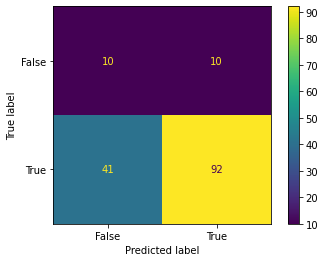

In [55]:
# make preditions on our test set
y_hat_test = model.predict(X_test_df2)
print(classification_report(y_test_subset2,y_hat_test ))
cm = metrics.confusion_matrix(y_test_subset2,y_hat_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show() 


In [56]:
# get the predicted probabilities
y_hat_test_proba = model.predict_proba(X_test_df2)

# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]

# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_subset2 .copy()

y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_hat_test)], axis = 1)

y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test_df2.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
268,1,0.530497,1
325,1,0.726886,1
175,1,0.878055,1
61,1,0.903690,1
280,1,0.613652,1


In [57]:
# assign a threshold value to differentiate good with bad
tr = 0.4
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimat threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.05882353, 0.07189542],
       [0.15686275, 0.7124183 ]])

1. AUROC=0.6758, 
2. Gini=0.3515, 
3. KS=0.3564 (p-value: 1.768e-02)


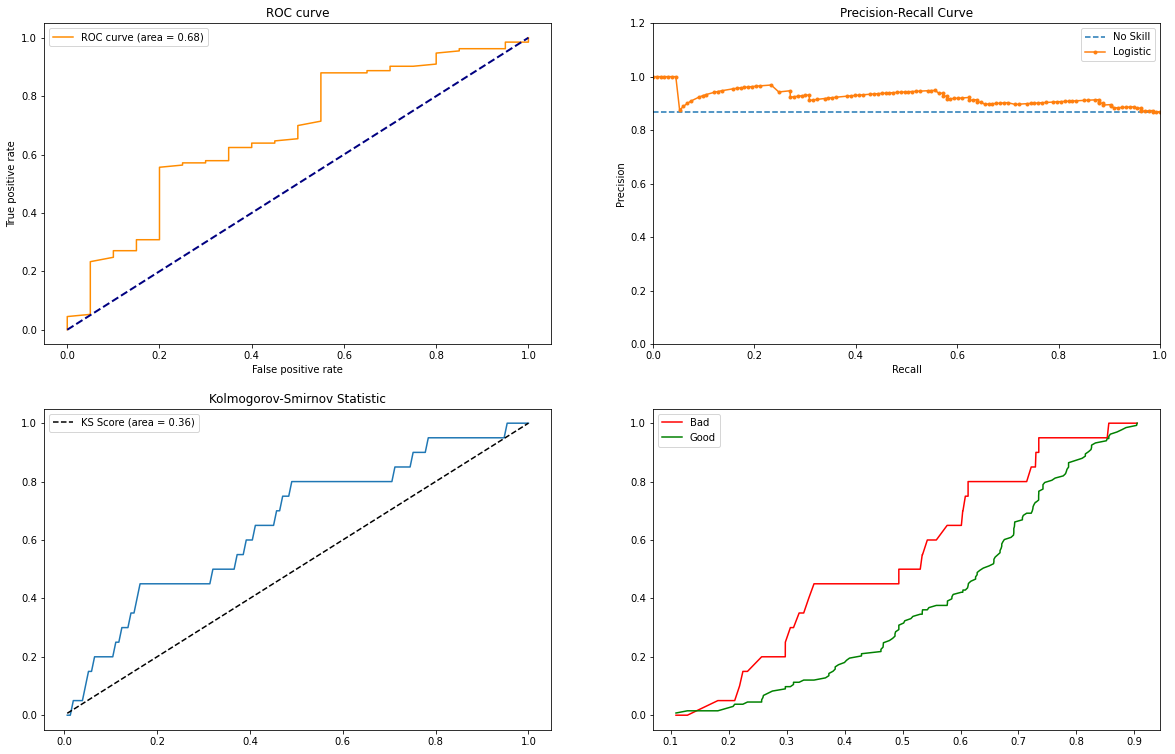

In [58]:
# get the predicted probabilities
y_hat_test_proba = model.predict_proba(X_test_df2)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]
ks_good, auc_good, gini = evaluate_ks_and_roc_auc(y_test_subset2, y_hat_test_proba)

In [59]:
## Applying the Model - Scorecard Creation

# Concatenates two dataframes.
df_scorecard = summary_table.copy()
# create a new column, called 'Original feature name', which contains the value of the 'Feature name' column, up to the column symbol.
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split('_').str[0]
# Define the min and max threshholds for our scorecard
min_score = 300
max_score = 850
# calculate the sum of the minimum coefficients of each category within the original feature name
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# calculate the sum of the maximum coefficients of each category within the original feature name
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# create a new columns that has the imputed calculated Score based on the multiplication of the coefficient by the ratio of the differences between
# maximum & minimum score and maximum & minimum sum of cefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# update the calculated score of the Intercept (i.e. the default score for each loan)
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# round the values of the 'Score - Calculation' column and store them in a new column
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()

# so both our min and max scores are out by +1. we need to manually adjust this
# Which one? We'll evaluate based on the rounding differences of the minimum category within each Original Feature Name.
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
# look like we can get by deducting 1 from the Intercept
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.loc[0, 'Score - Final'] = 215
df_scorecard

,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,Intercept,-0.406495,Intercept,529.173072,529.0,-0.173072,215.0
1,Purpose_1,1.363390,Purpose,136.146018,136.0,-0.146018,136.0
2,Purpose_2,0.271599,Purpose,27.121451,27.0,-0.121451,27.0
3,Purpose_3,0.531204,Purpose,53.045256,53.0,-0.045256,53.0
4,Purpose_4,0.414381,Purpose,41.379443,41.0,-0.379443,41.0
5,Purpose_5,-0.709060,Purpose,-70.805652,-71.0,-0.194348,-71.0
6,Purpose_6,-0.214039,Purpose,-21.373600,-21.0,0.373600,-21.0
7,Purpose_8,0.453307,Purpose,45.266519,45.0,-0.266519,45.0
8,Purpose_9,-0.522618,Purpose,-52.187855,-52.0,0.187855,-52.0
9,Age_band_27_32,0.337982,Age,33.750368,34.0,0.249632,34.0


In [60]:
# make preditions on our test set
y_hat_test = model.predict(X_test_df2)
# get the predicted probabilities
y_pred = model.predict_proba(X_test_df2)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_pred[:][: , 1]
probability_0 = y_pred[:][: , 0]
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_subset2.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(probability_0), pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_hat_test)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'Prob_0', 'Prob_1', 'y_hat_test']
y_test_proba.index = X_test_df2.index
y_test_proba.head()
# Calculate the scorecard points for each variable
basepoints = 600
PDO = 20
factor = PDO / np.log(2)
offset = basepoints - factor * np.log(1/50)

In [61]:
for i in range(len(y_test_proba['Prob_0'])):
    if y_test_proba['Prob_0'].iloc[i]<0:
        y_test_proba['Prob_0'].replace(y_test_proba['Prob_0'].iloc[i], 0.01, inplace=True)

logistics_regression_score_3_or_4 = pd.concat([X_test_df2,y_test_proba], axis=1)

In [62]:
logistics_regression_score_3_or_4['Credit_Score'] = logistics_regression_score_3_or_4.apply(lambda row: round(np.log(row.Prob_0/row.Prob_1)*factor+offset), axis=1)

logistics_regression_score_3_or_4

,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_8,Purpose_9,Age_band_27_32,Age_band_32_37,...,Duration_band_24_60,Amount_band_1287_1818,Amount_band_1818_2677,Amount_band_2677_4201,Amount_band_4201_15653,y_test_class_actual,Prob_0,Prob_1,y_hat_test,Credit_Score
268,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.469503,0.530497,1,709
325,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0.273114,0.726886,1,685
175,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0.121945,0.878055,1,656
61,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.096310,0.903690,1,648
280,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.386348,0.613652,1,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.414755,0.585245,1,703
193,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.264986,0.735014,1,683
265,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.190307,0.809693,1,671
749,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.184672,0.815328,1,670


### Q5. Derive ROC curves for all scorecards using the validation set applicable to each, showing in detail how sensitivity and specificity have been calculated. Estimate the Gini coefficient and KS values for each. Explain and comment on your results.<a name="7"></a>

<ul>
<h3>Subset 1</h3>	
<h4>Linear Regression</h4>	
    
    AUC(0.7223):	Indicates that the model outperforms random guessing but still has space for improvement.
    Gini Coefficients(0.4446): The model separates positive and negative samples well, but there is still room for improvement.
	KS Value(0.4134): Indicates that the model is effective at distinguishing between positive and negative data.
    
<h4>Logistic Regression</h4>	
    
    AUC(0.7189): Model is performing better than random guessing
	Gini Coefficients(0.4389): Model is doing a reasonable job of separating the positive and negative samples
	KS Value(0.3957): The model can differentiate positive and negative samples, but there is room for improvement.

<h3>Subset 2</h3>	
<h4>Linear Regression</h4>	

    AUC: 0.6664, Gini Coefficients: 0.3327, KS Value: 0.3192	
    The AUC (Area Under the Receiver Operating Characteristic Curve) and KS (Kolmogorov-Smirnov) statistics measure the model's ability to distinguish between positive and negative samples. The AUC score of 0.6664 suggests better than random guessing, while the KS value of 0.3192 suggests better separation.
			
<h4>Logistic Regression</h4>	
    
    AUC: 0.6754, Gini Coefficients: 0.3508, KS Value: 0.3564	
    KS measures the maximum difference between the cumulative distribution functions of the positive and negative samples. A higher KS value indicates the better separation between the two classes.
		
</ul>